In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA


In [2]:
# Cargar dataset Breast Cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
target_names = cancer.target_names

print("Shape del dataset:", X.shape)
print("Clases:", target_names)

# Primeras 5 muestras
print("\nPrimeras 5 filas de datos:")
print(X[:5])
print("\nEtiquetas:", y[:5])


Shape del dataset: (569, 30)
Clases: ['malignant' 'benign']

Primeras 5 filas de datos:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  

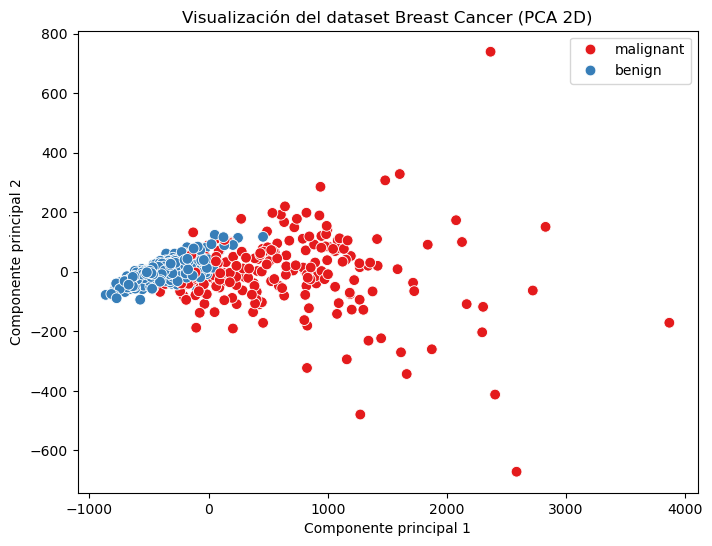

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=[target_names[i] for i in y], 
                palette="Set1", s=60)
plt.title("Visualización del dataset Breast Cancer (PCA 2D)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [5]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Predicciones
y_pred = ada.predict(X_test)


Accuracy: 0.9532163742690059
Precision: 0.9459459459459459
Recall: 0.9813084112149533
F1 Score: 0.963302752293578


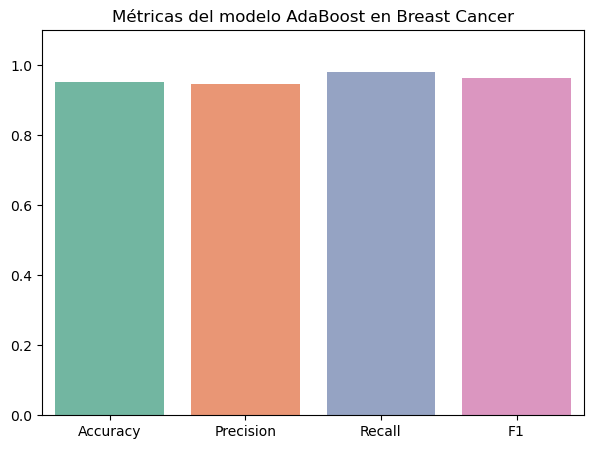

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="binary")
recall = recall_score(y_test, y_pred, average="binary")
f1 = f1_score(y_test, y_pred, average="binary")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Gráfica de métricas
metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}

plt.figure(figsize=(7,5))
sns.barplot(
    x=list(metrics.keys()),
    y=list(metrics.values()),
    hue=list(metrics.keys()),
    palette="Set2",
    legend=False
)
plt.ylim(0,1.1)
plt.title("Métricas del modelo AdaBoost en Breast Cancer")
plt.show()


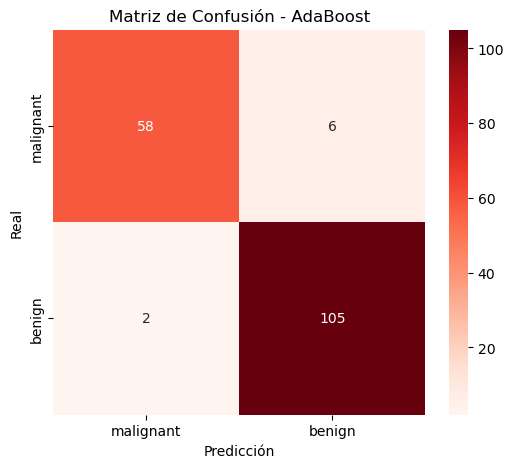

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - AdaBoost")
plt.show()


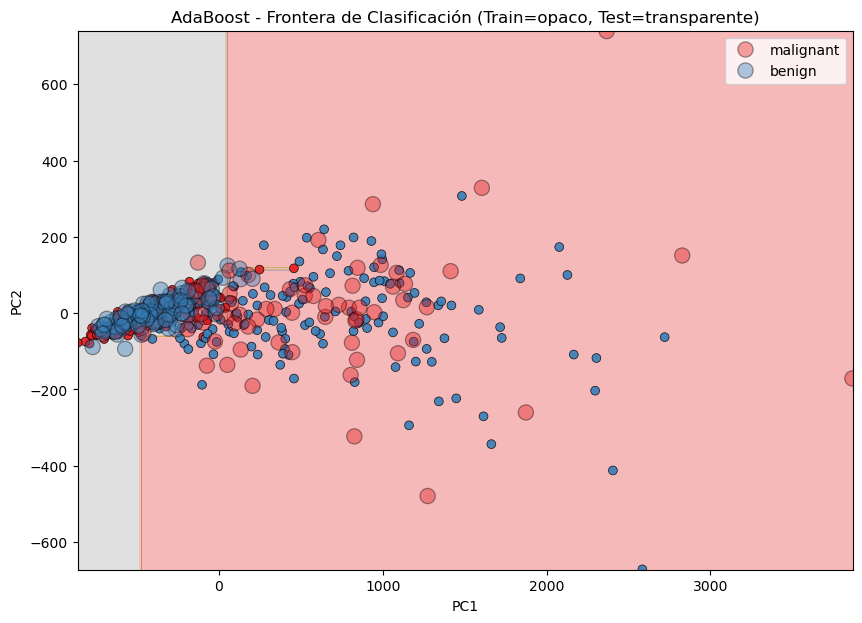

In [9]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenar
ada_2d = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_2d.fit(X_train_pca, y_train)

# Malla
x_min, x_max = X_pca[:,0].min() - 1, X_pca[:,0].max() + 1
y_min, y_max = X_pca[:,1].min() - 1, X_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = ada_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set1")

# Train
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1],
                hue=[target_names[i] for i in y_train], palette="Set1",
                s=40, alpha=0.9, edgecolor="k", legend=False)

# Test
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1],
                hue=[target_names[i] for i in y_test], palette="Set1",
                s=120, alpha=0.4, edgecolor="k", legend='brief')

plt.title("AdaBoost - Frontera de Clasificación (Train=opaco, Test=transparente)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()
